![header-Airbnbemoji](img/header-Airbnbemoji.jpg)


# 🏡 Airbnb Listings Analysis: Trends in Professional Hosting

**Author:** Verica Bojkovska  
**Date:** July 2025
---
## 📌 Objective  
Identify trends across inferred professional hosts in six global cities using InsideAirbnb data.



## Load and Combine Data
Using `pandas` to import listings for six cities and merge them into one DataFrame.
## Flag Professional Hosts
Hosts with more than 1 listing are inferred as professionals.
## Calculate Professional Host Shares
Calculate the percentage of professional hosts per city.
## Compare Key Metrics
Compare key metrics such as price, minimum nights, and availability for professional vs. non-professional hosts.
## Visualize Room Types and Neighborhood Prices
Visualize differences in room types and prices between professional and non-professional hosts.
## Interactive Map Example
Display an interactive map of Bangkok listings, highlighting professional vs. non-professional hosts.

## ✅ Summary & Insights
- Overall, **X%** of listings are by professional hosts.
- **Bangkok** has the highest share at approximately **70%**.
- Professional hosts tend to charge **more on average**.

In [2]:
# ----------------------------------------------------------
# 📌 Airbnb Listings Analysis: Professional Hosts Trends
# ----------------------------------------------------------
# Objective:
# Identify trends across listings operated by inferred
# professional hosts in six cities using InsideAirbnb data.
# ----------------------------------------------------------

# 1️⃣ Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

sns.set(style="whitegrid")

# ----------------------------------------------------------
# 2️⃣ Load Data (✅ Corrected filenames!)
# ----------------------------------------------------------

# Read each city's CSV and add city name
austin = pd.read_csv("data/listings_austin.csv", index_col=0)
bangkok = pd.read_csv("data/listings_bangkok.csv", index_col=0)
buenos_aires = pd.read_csv("data/listings_buenos_aires.csv", index_col=0)
cape_town = pd.read_csv("data/listings_cape_town.csv", index_col=0)
istanbul = pd.read_csv("data/listings_istanbul.csv", index_col=0)
melbourne = pd.read_csv("data/listings_melbourne.csv", index_col=0)

# Add city column to each DataFrame
austin['city'] = 'Austin'
bangkok['city'] = 'Bangkok'
buenos_aires['city'] = 'Buenos Aires'
cape_town['city'] = 'Cape Town'
istanbul['city'] = 'Istanbul'
melbourne['city'] = 'Melbourne'

# Combine all six into one DataFrame
df = pd.concat([austin, bangkok, buenos_aires, cape_town, istanbul, melbourne], ignore_index=True)

# Preview
print(df.shape)
df.head()

(103817, 18)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
0,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021-07-02,0.36,3,35,2,NaN,Austin
1,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27614,-97.71320,Private room,114,30,9,2017-02-24,0.21,3,0,0,NaN,Austin
2,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021-09-25,24.16,1,324,39,NaN,Austin
3,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,264,2021-07-03,5.95,1,0,7,NaN,Austin
4,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-04-02,1.27,1,0,4,NaN,Austin


In [33]:
# Hosts with >1 listing → Professional
df['is_professional'] = df['calculated_host_listings_count'] > 1

# Overall % of listings by professional hosts
perc_pros = df['is_professional'].mean() * 100
print(f"Estimated % of listings by professional hosts: {perc_pros:.1f}%")


Estimated % of listings by professional hosts: 55.5%


           city  percent_professional
1       Bangkok              0.701279
4      Istanbul              0.592129
3     Cape Town              0.564798
2  Buenos Aires              0.504329
5     Melbourne              0.466086
0        Austin              0.465170


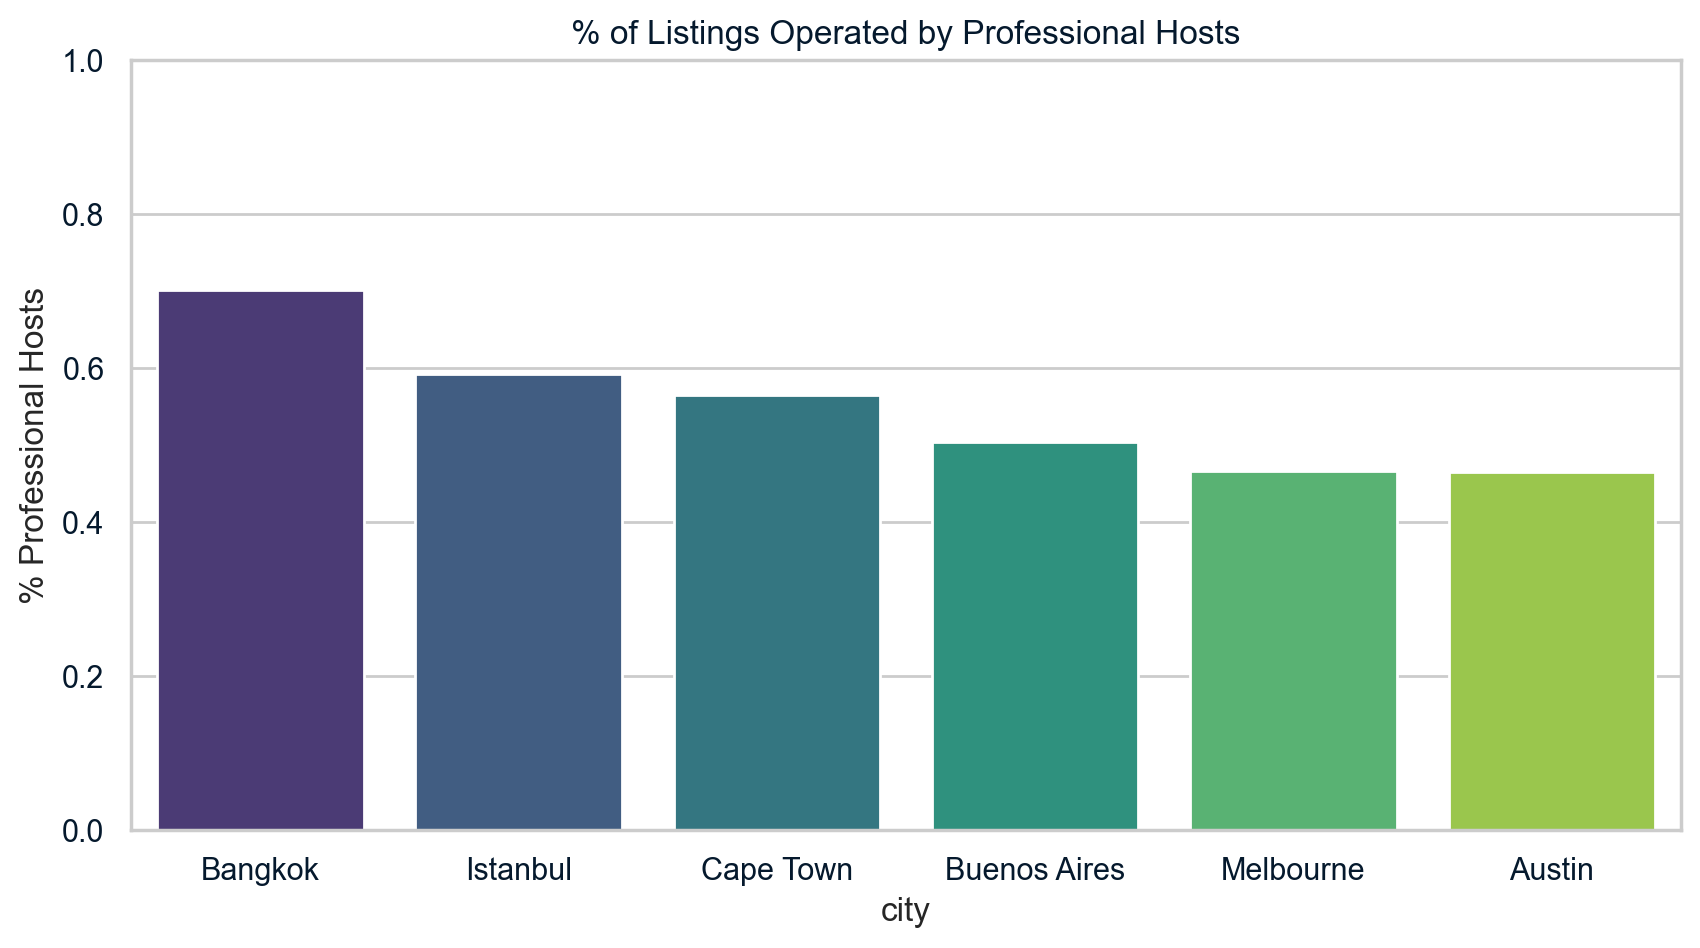

In [34]:
# Calculate % of professional hosts per city
city_pros = (
    df.groupby('city')['is_professional']
    .mean()
    .reset_index(name='percent_professional')
    .sort_values('percent_professional', ascending=False)
)

print(city_pros)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=city_pros, x='city', y='percent_professional', palette="viridis")
plt.title("% of Listings Operated by Professional Hosts")
plt.ylabel("% Professional Hosts")
plt.ylim(0, 1)
plt.show()


In [35]:
comparison = (
    df.groupby('is_professional')
    .agg({
        'price': 'mean',
        'minimum_nights': 'mean',
        'availability_365': 'mean'
    })
    .reset_index()
)

comparison['host_type'] = comparison['is_professional'].map({True: "Professional", False: "Non-Professional"})
print(comparison)


   is_professional        price  ...  availability_365         host_type
0            False  1912.050698  ...        184.965010  Non-Professional
1             True  2048.640849  ...        241.854841      Professional

[2 rows x 5 columns]


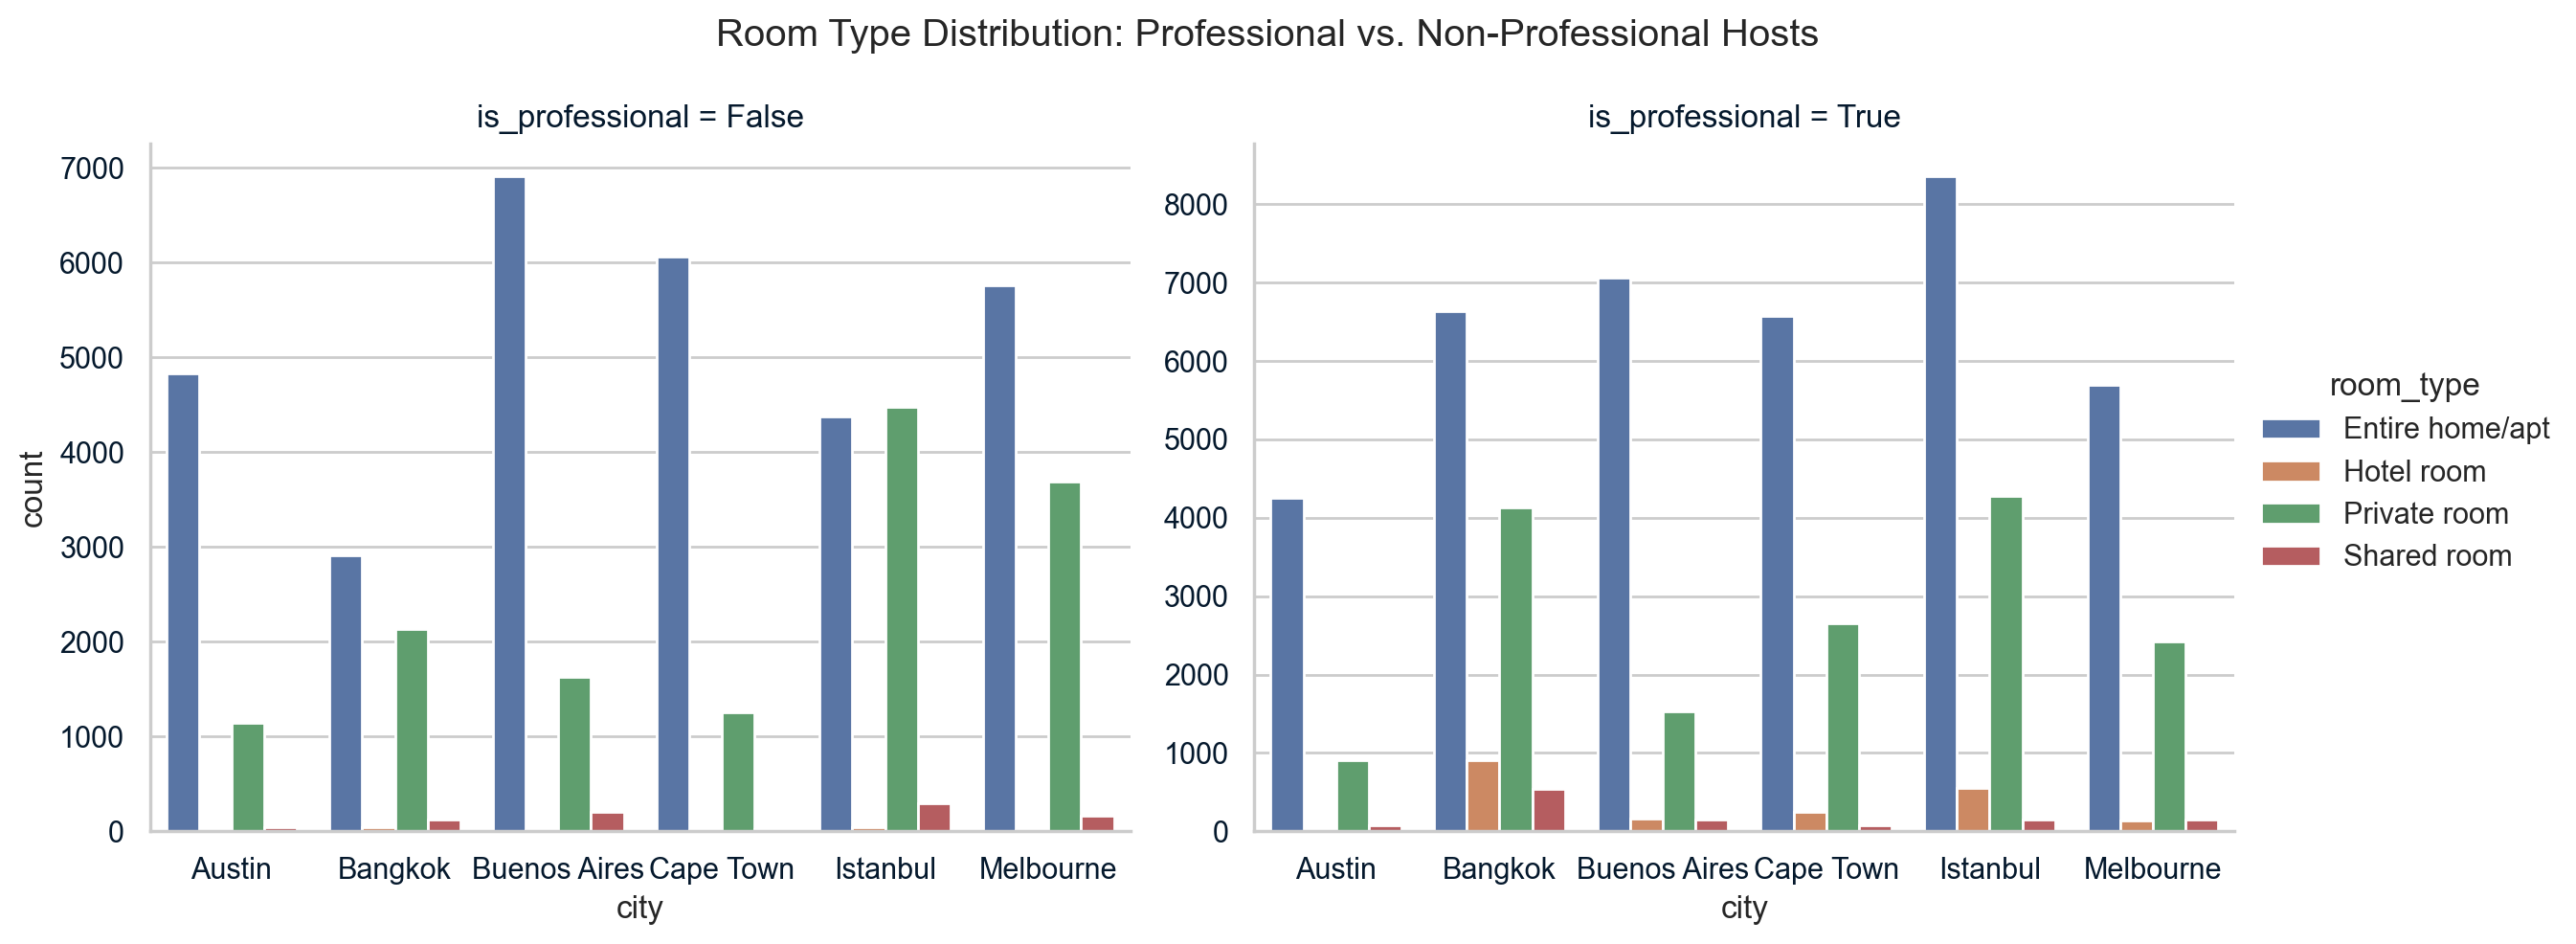

In [36]:
room_types = (
    df.groupby(['city', 'is_professional', 'room_type'])
    .size()
    .reset_index(name='count')
)

sns.catplot(
    data=room_types,
    x='city',
    y='count',
    hue='room_type',
    col='is_professional',
    kind='bar',
    sharey=False,
    height=5,
    aspect=1.2
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Room Type Distribution: Professional vs. Non-Professional Hosts")
plt.show()


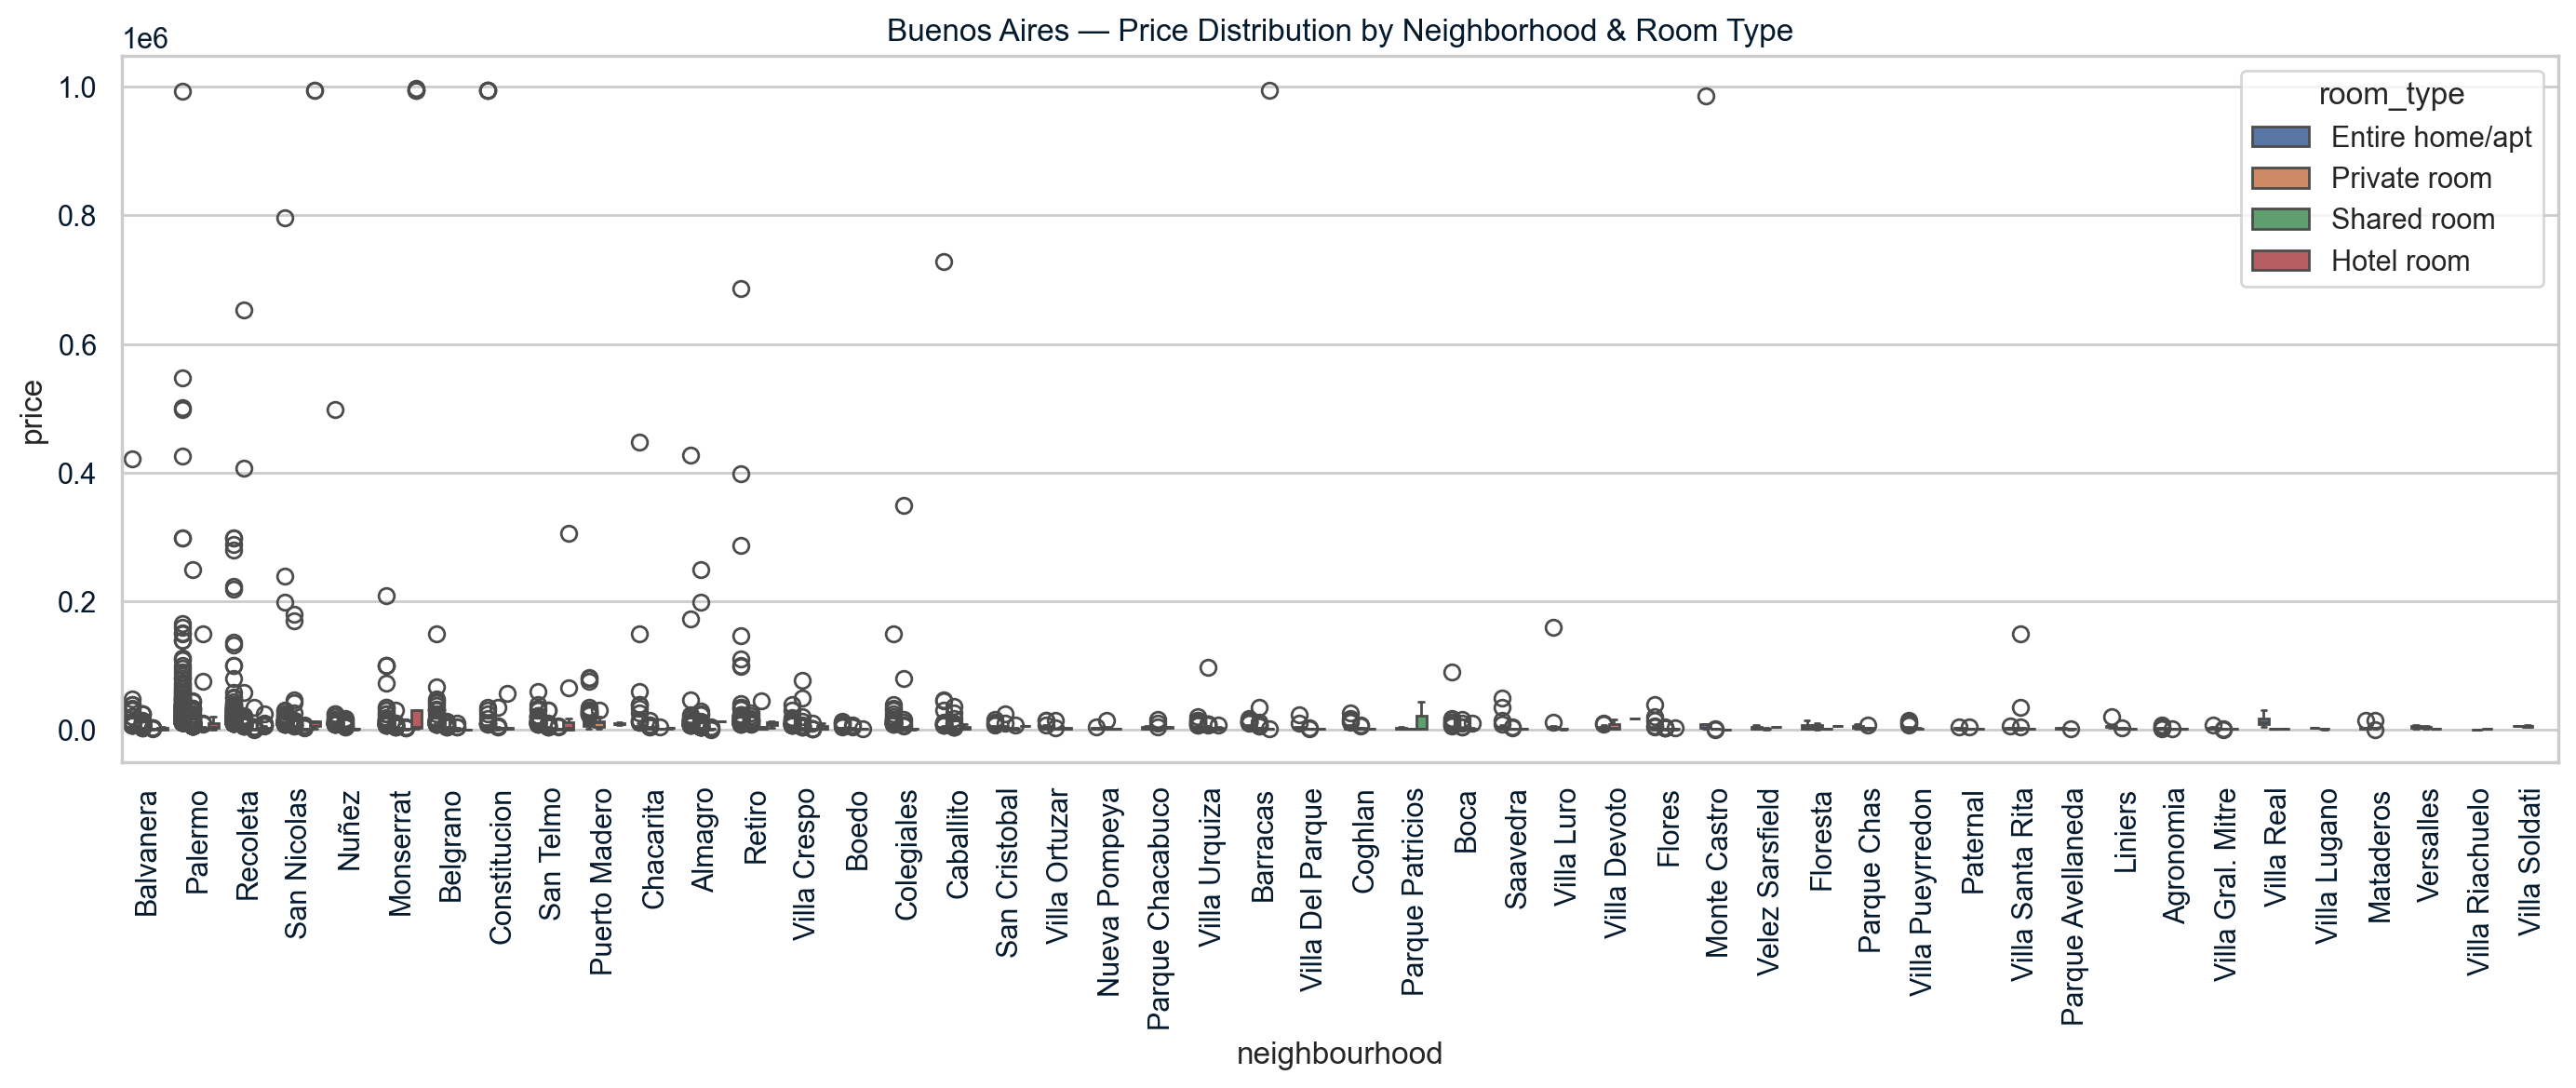

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=buenos_aires,
    x='neighbourhood',
    y='price',
    hue='room_type'
)
plt.title("Buenos Aires — Price Distribution by Neighborhood & Room Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [38]:

bangkok['is_professional'] = bangkok['calculated_host_listings_count'] > 1

# Sample from Bangkok listings
bangkok_sample = bangkok.sample(500)

# Create map
bangkok_map = folium.Map(
    location=[bangkok['latitude'].mean(), bangkok['longitude'].mean()],
    zoom_start=12
)

# Add points
for _, row in bangkok_sample.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='red' if row['is_professional'] else 'blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"${row['price']}"
    ).add_to(bangkok_map)

bangkok_map
